# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Método del Trapecio

### Ejercicio 12.-  Se considera la integral  
### $$  \int_1^{3} \frac{\cos(x)}{x} \, dx $$
### (a) Calcula la aproximación de dicha integral mediante el Método del Trapecio con $n=25$ subintervalos.

### (b)  Da una cota superior teórica del error absoluto de la aproximación obtenida en (a).

### (c) Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.

SOLUCIÓN

### (a) Calcula la aproximación de dicha integral mediante el Método del Trapecio con $n=25$ subintervalos: 

### Método del Trapecio

En el método del Trapecio subdividimos el intervalo $[a,b]$ con siguientes nodos equiespaciados: 
$$x_k=a+k\cdot \frac{b-a}{n}$$
para $k=0,1,\dots,n$.

La fórmula del Método del Trapecio nos aproxima la integral de una función $f(x)$ en el intervalo $[a,b]$ de la siguiente forma:
$$\displaystyle \int_a^b  {f(x)} \, dx \ \approx \dfrac{b-a}{2n}\Bigl(f(a)+2f(x_1)+\dots+2f(x_{n-1})+f(b)\Bigr)$$

Comenzamos definiendo la función y los nodos para nuestro caso en particular:

In [1]:
f(x)=cos(x)/x
f

x |--> cos(x)/x

In [2]:
a=1;
b=3;
n=25;

In [3]:
X=[a+k*(b-a)/n for k in range(0,n+1)]
show(X)

[1,
 27/25,
 29/25,
 31/25,
 33/25,
 7/5,
 37/25,
 39/25,
 41/25,
 43/25,
 9/5,
 47/25,
 49/25,
 51/25,
 53/25,
 11/5,
 57/25,
 59/25,
 61/25,
 63/25,
 13/5,
 67/25,
 69/25,
 71/25,
 73/25,
 3]

El valor aproximado de la integral usando el Método del trapecio es:

In [4]:
trapecio=(b-a)/(2*n)*(f(a)+2*sum(f(X[k]) for k in range(1,n))+f(b))
trapecio.n()

-0.217003929737339

Veamos el significado de lo que acabamos de calcular: informalmente hablando, se suma el área encima del eje X y se resta la de debajo

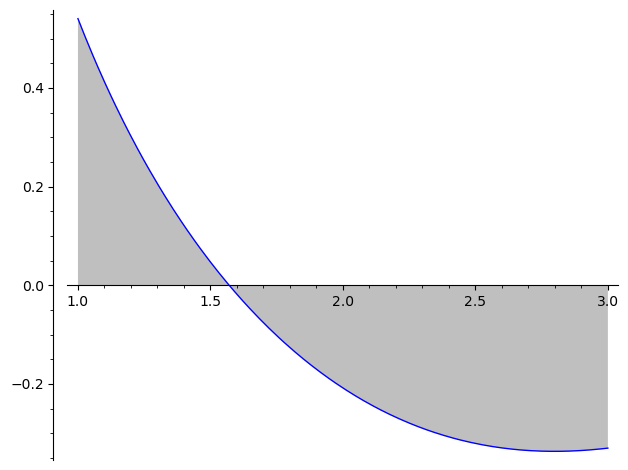

In [5]:
plot(f,x,a,b,fill=true)

### (b) Da una cota superior teórica del error absoluto de la aproximación obtenida en (a):

### Cota del error en el Método del Trapecio 
La cota del error absoluto cometido en el Método del Trapecio la podemos dar de la siguiente forma: 

Dada una constante M de forma que $|f''(x)|\leq M$ para todo $x\in [a,b]$. 
$$\displaystyle \left| {\rm Trapecio}_{n}(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M $$

Para determinar $M$ calculamos $f''(x)$ y la representamos gráficamente en $[a,b]$:

In [6]:
show(derivative(f(x),x,2))

-cos(x)/x + 2*sin(x)/x^2 + 2*cos(x)/x^3

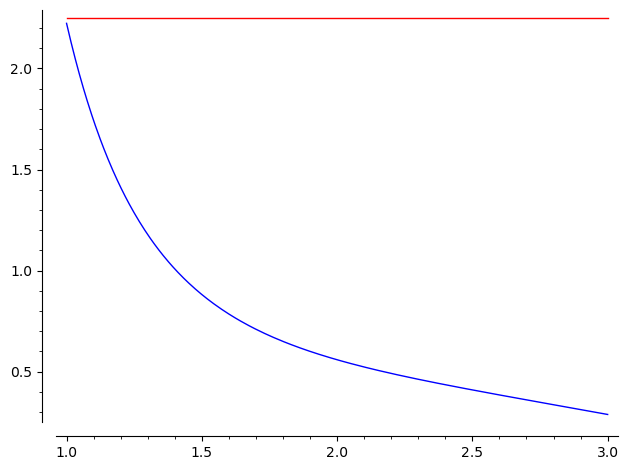

In [7]:
plot(abs(derivative(f(x),x,2)),a,b)+plot(2.25,a,b,color='red')

<p>En esta gráfica se observa que la constante $M=2.25$ cumple $|f''(x)|\leq M$ para todo $x\in [a,b]$.</p>
<p>Por tanto, una cota superior del error absoluto cometido es:</p>

In [8]:
M=2.25;
cota=(b-a)^3/(12*n^2)*M;
cota

0.00240000000000000

### (c) Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.


Vamos a comprobar que efectivamente el error cometido es menor que la cota encontrada. Para ello comparamos nuestro resultado con el Método del Trapecio con el dado por el propio SAGE,

In [9]:
integral(f(x),x,a,b).n()

-0.217774136892968

In [10]:
trapecio.n()

-0.217003929737339

<p>y la comparamos con el resultado obtenido por el método del trapecio calculando el valor absoluto de la diferencia:</p>

In [11]:
error=abs(trapecio-integral(f(x),x,a,b));
error.n()

0.000770207155628345

que es menor que la cota, lo comprobamos:

In [12]:
error.n()<cota

True

Para ver gráficamente lo qué hemos calculado con el método del TRAPECIO calculamos la integral definida por la función interpoladora lineal a trozos en los nodos considerados, en rojo.

In [13]:
show(X) 
XY=[(X[j],f(X[j])) for j in range(0,n+1)]; 
r(c,d,x)=(f(d)-f(c))/(d-c)*(x-c)+f(c)
L=piecewise([[(X[j],X[j+1]),r(X[j],X[j+1],x)] for j in range(0,n)],var=x);

[1,
 27/25,
 29/25,
 31/25,
 33/25,
 7/5,
 37/25,
 39/25,
 41/25,
 43/25,
 9/5,
 47/25,
 49/25,
 51/25,
 53/25,
 11/5,
 57/25,
 59/25,
 61/25,
 63/25,
 13/5,
 67/25,
 69/25,
 71/25,
 73/25,
 3]

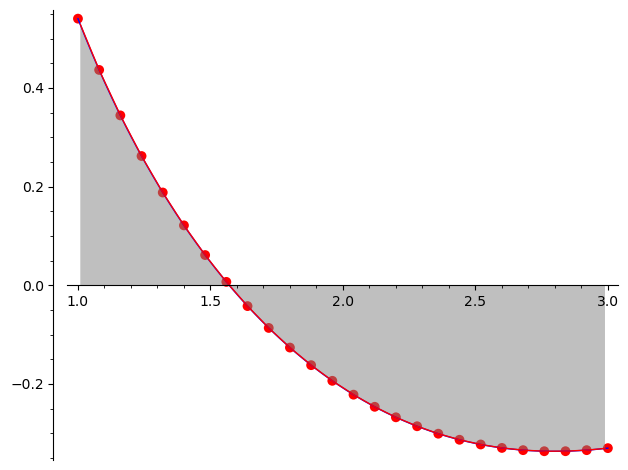

In [14]:
point2d(XY,size=50,color='red')+plot(f,a,b)+plot(L(x),a,b,color='red',fill=true)
#el fill está evidentemente en el plot de L